In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = 'ISO-8859-1', header=None)
data.columns = ['label', 'id','time','SQL','username','text']
data.head()

,label,id,time,SQL,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [2]:
df = data.drop(["id","time","SQL","username"],axis = 1)
df.head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [3]:
! pip install tweet-preprocessor
import preprocessor as p

In [4]:
p.set_options(p.OPT.URL, p.OPT.EMOJI)

In [5]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [6]:
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
tok = WordPunctTokenizer()

In [7]:
for i in (['against','ain','aren',"aren't",'can','couldn',"couldn't",'didn',"didn't",'doesn',"doesn't", 'don',"don't",'hadn',"hadn't", 'hasn',
 "hasn't", 'haven',"haven't",'isn',"isn't",'mightn',"mightn't", 'mustn',"mustn't",'needn',"needn't",'no','nor','not','shan',"shan't",'shouldn',
 "shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]):
    stop_words.remove(i)

In [8]:
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not","isn":"is not", "aren":"are not", "wasn":"was not", "weren":"were not",
                "haven":"have not","hasn":"has not","hadn":"had not","won":"will not",
                "wouldn":"would not", "don":"do not", "doesn":"does not","didn":"did not","couldn":"could not",
                 "shouldn":"should not","mightn":"might not",
                "mustn":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

In [9]:
def tweet_process(text):
#     Remove url
    no_url = p.clean(text)

#  Removing Twitter Handles (@user)
    no_handles = remove_pattern(no_url,"@[\w]*")
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], no_handles)

#  Removing Punctuations, Numbers, and Special Characters
    clean_text = re.sub("[^a-zA-Z]", " ",neg_handled)

# Remove short words
    words = [x for x  in tok.tokenize(clean_text) if len(x) > 1]
#     clean_text = ' '.join([w for w in clean_text.split() if len(w)>2])

# # Tokenization
#     words = tok.tokenize(clean_text)

# Stemming
    stem_words = [stemmer.stem(i) for i in words] # stemming

# Stopwords
    filtered_words = [w for w in stem_words if not w in stop_words]

    return " ".join(filtered_words)

Test on first 10 tweets

In [10]:
testing = df['text'][:10]
test_result = []
for t in testing:
    test_result.append(tweet_process(t))
test_result

['awww bummer shoulda got david carr third day',
 'upset can not updat hi facebook text might cri result school today also blah',
 'dive mani time ball manag save rest go bound',
 'whole bodi feel itchi like fire',
 'no not behav mad whi becaus can not see',
 'not whole crew',
 'need hug',
 'hey long time no see ye rain bit onli bit lol fine thank',
 'nope not',
 'que muera']

Process raw data in batch

In [12]:
nums = [0,400000,800000,1200000,1600000]
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for num in range(4):
    for i in range(nums[num],nums[num+1]):
        if( (i+1)%50000 == 0 ):
            print("{0} Tweets have been processed".format(i+1))                                                                    
        clean_tweet_texts.append(tweet_process(df['text'][i]))
     


Cleaning and parsing the tweets...

50000 Tweets have been processed
100000 Tweets have been processed
150000 Tweets have been processed
200000 Tweets have been processed
250000 Tweets have been processed
300000 Tweets have been processed
350000 Tweets have been processed
400000 Tweets have been processed
450000 Tweets have been processed
500000 Tweets have been processed
550000 Tweets have been processed
600000 Tweets have been processed
650000 Tweets have been processed
700000 Tweets have been processed
750000 Tweets have been processed
800000 Tweets have been processed
850000 Tweets have been processed
900000 Tweets have been processed
950000 Tweets have been processed
1000000 Tweets have been processed
1050000 Tweets have been processed
1100000 Tweets have been processed
1150000 Tweets have been processed
1200000 Tweets have been processed
1250000 Tweets have been processed
1300000 Tweets have been processed
1350000 Tweets have been processed
1400000 Tweets have been processed
1450

In [13]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df['label']
clean_df.head()

,text,target
0,awww bummer shoulda got david carr third day,0
1,upset can not updat hi facebook text might cri...,0
2,dive mani time ball manag save rest go bound,0
3,whole bodi feel itchi like fire,0
4,no not behav mad whi becaus can not see,0


In [22]:
clean_df1 = clean_df[0:399999]
clean_df2 = clean_df[400000:799999] 
clean_df3 = clean_df[800000:1199999]
clean_df4 = clean_df[1200000:1599999]

In [33]:
clean_df1.to_csv('clean_tweet1.csv')
clean_df2.to_csv('clean_tweet2.csv')
clean_df3.to_csv('clean_tweet3.csv')
clean_df4.to_csv('clean_tweet4.csv')

## Check processed data

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1600000 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


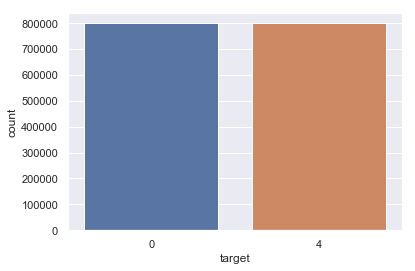

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
sns.set(style='darkgrid',color_codes=True)
# Figure 1: positive vs negative
sns.countplot(x='target',data=clean_df)

In [16]:
clean_df.to_csv('clean_tweet.csv')


In [53]:
my_df = pd.read_csv('clean_tweet.csv',index_col=0)
my_df.head()

,text,target
0,awww bummer shoulda got david carr third day,0
1,upset can not updat hi facebook text might cri...,0
2,dive mani time ball manag save rest go bound,0
3,whole bodi feel itchi like fire,0
4,no not behav mad whi becaus can not see,0


In [54]:
my_df.count()

text      1593376
target    1600000
dtype: int64

In [55]:
my_df = my_df.dropna()
my_df.count()

text      1593376
target    1593376
dtype: int64

## Model Implementation

Split Dataset

In [56]:
from sklearn.model_selection import train_test_split
SEED = 2000
x_train, x_test, y_train, y_test = train_test_split(my_df['text'], my_df['target'], test_size=0.2, random_state=SEED)

Building Pipeline for Feature Extraction and Modelling

In [80]:
def nfeature_accuracy_checker(vectorizer, n_features, stop_words, ngram_range, classifier):
#     print (classifier)
#     print("\n")
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
#     print("Test result for {} features".format(n_features))
    nfeature_accuracy,pred,model = accuracy_summary(checker_pipeline, x_train, y_train, x_test,  y_test)
    return nfeature_accuracy,pred,model

In [81]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy,y_pred,sentiment_fit

In [72]:
from nltk.classify import NaiveBayesClassifier
>>> from nltk.corpus import subjectivity
>>> from nltk.sentiment import SentimentAnalyzer
>>> from nltk.sentiment.util import *
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from sklearn.linear_model import LogisticRegression
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
tvec = TfidfVectorizer()
cvec = CountVectorizer()
nb = BernoulliNB()
nb_tvec_acc,nb_tvec_pred = nfeature_accuracy_checker(tvec, 2000, stop_words, (1,1), nb)
nb_cvec_acc, nb_cvec_pred = nfeature_accuracy_checker(cvec, 2000, stop_words, (1,1), nb)

In [74]:
print(nb_tvec_acc)
print(nb_cvec_acc)

0.7643343082001782
0.7643343082001782


In [75]:
nb_tvec_2gram_acc,nb_tvec_2gram_pred = nfeature_accuracy_checker(tvec, 2000, stop_words, (1,2), nb)
nb_tvec_3ram_acc,nb_tvec_3gram_pred = nfeature_accuracy_checker(tvec, 2000, stop_words, (1,3), nb)

In [65]:
print(nb_tvec_2gram_acc)
print(nb_tvec_3gram_acc)

0.7626931428786604
0.7628688699494157


In [82]:
lr_tvec_3gram_acc,lr_tvec_3gram_pred,lr_tvec_3gram_model = nfeature_accuracy_checker(tvec, 2000, stop_words, (1,3), lr)

C:\Users\yangw\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
lr_tvec_3gram_model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=2000, ngram_range=(1, 3),
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'all', 'am', 'an', 'and',
                                             'any', 'are', 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'd', 'did',
                                             'do', 'does', 'doing', 'down',
                                             'during', ...})),
                ('classifier', LogisticRegression())])

In [83]:
lr_tvec_3gram_acc

0.7807585133489814

Save Model

In [ ]:
from joblib import dump, load
dump(lr_tvec_3gram, 'lr_tvec_3gram.joblib') 
# clf = load('filename.joblib') 
dump(nb_tvec_3gram_acc, 'lr_tvec_3gram.joblib') 